In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Problem 1

### Problem 5.1

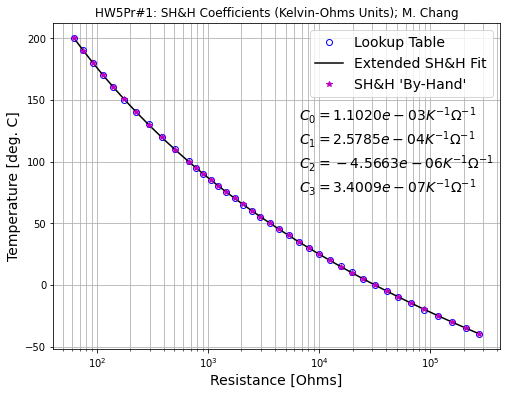

In [140]:
data = scipy.io.loadmat("Therm3950_Data.mat", squeeze_me = True) #loading data
resist = data['Resist_Ohm']
temp = data['Temp_degK']

plt.figure(figsize = (8, 6))
fs = 14

#lookup table
temp_C = temp - 273
plt.semilogx(resist, temp_C, 'bo', markerfacecolor = 'none', label = 'Lookup Table')

#(1/T) = C_0 + C_1(ln R) + C_2(ln R)^2 + C_3(ln R)^3
#y = 1/T and x = ln R
#coeffs = np.polyfit(x, y, 3)
#C_3 = coeffs[0]
#C_2 = coeffs[1]
#C_1 = coeffs[2]
#C_0 = coeffs[3]
#replace the original equation with the parameters from np.polyfit

#Extended SH&H Fit, see above for getting coefficients
x = np.log(resist)
y = 1 / temp
coeffs = np.polyfit(x, y, 3)
C_3 = coeffs[0]
C_2 = coeffs[1]
C_1 = coeffs[2]
C_0 = coeffs[3]
inverse_temp = np.polyval(coeffs, x) #getting temp values via coefficients
corrected_temp = (1/inverse_temp) - 273 #converting temp to Celsius (K = 273 + C)
plt.semilogx(resist, corrected_temp, 'k-', label = 'Extended SH&H Fit')

#by hand
fit = C_0 + C_1 *(x) + C_2*(x)**2 + C_3*(x)**3 #writing the equation out
corrected_fit = (1/fit) - 273 #converting temp to Celsius
plt.semilogx(resist, corrected_fit, 'm*', label = 'SH&H \'By-Hand\'')

plt.text(9**4, 75, '$C_0 = {0:1.4e}K^{{-1}}\Omega^{{-1}}$ \n$C_1 = {1:1.4e}K^{{-1}}\Omega^{{-1}}$ \n$C_2 = {2:1.4e}K^{{-1}}\Omega^{{-1}}$ \n$C_3 = {3:1.4e}K^{{-1}}\Omega^{{-1}}$'.format(C_0, C_1, C_2, C_3), fontsize = fs)

#labels and such
plt.legend(fontsize = fs)
plt.xlabel('Resistance [Ohms]', fontsize = fs)
plt.ylabel('Temperature [deg. C]', fontsize = fs)
plt.grid(which = 'both')

plt.title('HW5Pr#1: SH&H Coefficients (Kelvin-Ohms Units); M. Chang')
plt.savefig('Chang_SH&H.png', dpi = 150)

## Problem 5.4 (b)

0.09123436222779446


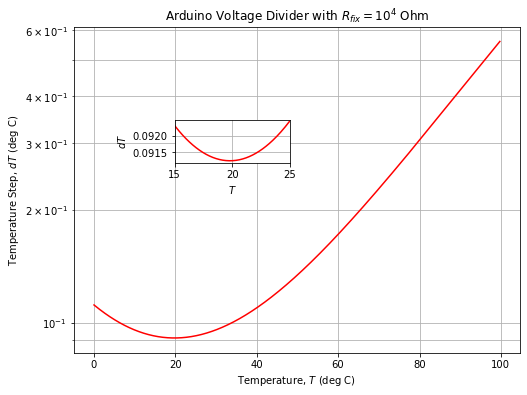

In [147]:
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(1, 1, 1)

def delta_T(V, V_i, Rfix): #function to convert voltage to temperature
    #INPUT: V, array of voltages
    #      V_i, fixed voltage
    #      Rfix, fixed resistance
    #OUTPUT: corrected_temp, temperature outputted
    
    R = (V/(V_i - V))*Rfix #getting resistance from voltage
    inverse_temp = np.polyval(coeffs, np.log(R)) #converting resistance to temperature, which was done earlier
    corrected_temp = (1/inverse_temp) - 273 #converting temperature from K to C
    
    return corrected_temp

dV = .005 #error of voltage
V_i = 5 #5V fixed voltage
Rfix = 10000 #10000 Ohm fixed resistance

V = np.linspace(0.25, 4.2, 1000) #going from ~0 to 5V
dT = delta_T(V + dV, V_i, Rfix) - delta_T(V, V_i, Rfix) #delta T
the_temp = delta_T(V, V_i, Rfix) #temperatures outputted from just using the V array (no delta)
temp_window_BA = ((the_temp > 0)&(the_temp <100)) #limiting the temperatures to 0 < t < 100 Celsius
temp_window = the_temp[temp_window_BA] #Using the boolean condition
dT_window = dT[temp_window_BA]
ax1.semilogy(temp_window, np.abs(dT_window), 'r-') #plotting the data

#labels, grid
ax1.grid(which = 'both')
ax1.set_title('Arduino Voltage Divider with $R_{fix} = 10^4$ Ohm')
ax1.set_xlabel('Temperature, $T$ (deg C)')
ax1.set_ylabel('Temperature Step, $dT$ (deg C)')

#inset image of the minimum dT
left, bottom, width, height = [0.3, 0.565, 0.2, 0.1]
inset_dimensions = [left, bottom, width, height]

ax2 = fig.add_axes(inset_dimensions)
temp_window_BA = ((the_temp > 15)&(the_temp <25)) #just plotting the data between temperatures 15 and 25 Celsius as the minimum is in that range
temp_window = the_temp[temp_window_BA] #applying boolean condition
dT_window = dT[temp_window_BA]
ax2.plot(temp_window, np.abs(dT_window), 'r-') #plotting data
ax2.set_xlim(15, 25) #limiting x-axis to center on minimum
ax2.grid(which = 'both')
ax2.set_ylabel('$dT$')
ax2.set_xlabel('$T$')

plt.savefig('Chang_10000Ohm.png', dpi = 150)

print(np.min(np.abs(dT)))

#smallest temperature differences are .091 deg C

## Problem 5.4 (c)

0.1472585980234271


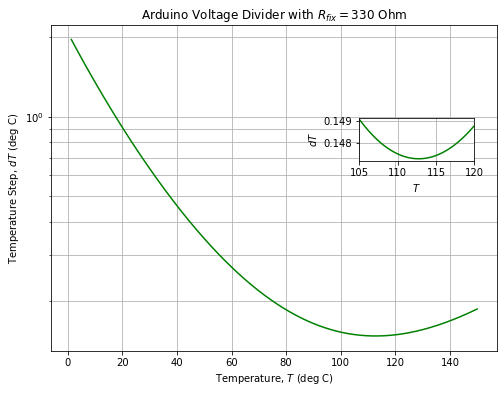

In [163]:
fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(1, 1, 1)

V = np.linspace(0.01, 4.95, 1000) #~0 to 5V range
Rfix = 330 #330 ohm fixed resistor

#same as above
dT = delta_T(V + dV, V_i, Rfix) - delta_T(V, V_i, Rfix)
the_temp = delta_T(V, V_i, Rfix)
temp_window_BA = ((the_temp > 0)&(the_temp <150)) #limiting temperatures from 0 to 150 Celsius
temp_window = the_temp[temp_window_BA]
dT_window = dT[temp_window_BA]
ax1.semilogy(temp_window, np.abs(dT_window), 'g-') #plotting data

#labels and such
ax1.grid(which = 'both')
ax1.set_xlabel('Temperature, $T$ (deg C)')
ax1.set_ylabel('Temperature Step, $dT$ (deg C)')
ax1.set_title('Arduino Voltage Divider with $R_{fix} = 330$ Ohm')

#inset image
left, bottom, width, height = [0.66, 0.565, 0.2, 0.1]
inset_dimensions = [left, bottom, width, height]

V = np.linspace(0.5, 4.95, 1000)
dT = delta_T(V + dV, V_i, Rfix) - delta_T(V, V_i, Rfix)
the_temp = delta_T(V, V_i, Rfix)

ax2 = fig.add_axes(inset_dimensions)
temp_window_BA = ((the_temp > 105)&(the_temp <120)) #limiting temperatures from 105 to 120 as the minimum is in that range
temp_window = the_temp[temp_window_BA]
dT_window = dT[temp_window_BA]
ax2.plot(temp_window, np.abs(dT_window), 'g-') #plotting data
ax2.set_xlim(105, 120)
ax2.grid(which = 'both')
ax2.set_ylabel('$dT$')
ax2.set_xlabel('$T$')

plt.savefig('Chang_330Ohm.png', dpi = 150)

print(np.min(np.abs(dT)))

#smallest temperature difference would be 0.14 deg C

## Problem 5.4 (d)

In [143]:
#Room temperature doesnt differ between 10k and 330 ohm resistors. There is less change with the 10k ohm resistor between data points when I observed on the Serial Plotter. The actual differences in step size matched the predictions given by the graph.